### Objective : In this notebook we will play around with the spotify datasets and do the following things
                
    1. Do EDA on data to understand the size of the data
    2. To reduce memory usage take each distinct Song and give it a numeric value 
    3. Convert each playlist of the user into sequential data by randomly grouping them based playlist name
    4. Hypothesis is simple that each song inplaylist can be played randomly

#### Spotify playlists dataset


This dataset is based on the subset of users in the #nowplaying dataset who publish their #nowplaying tweets via Spotify. In principle, the dataset holds users, their playlists and the tracks contained in these playlists. 

The csv-file holding the dataset contains the following columns: 
"user_id", "artistname", "trackname", "playlistname"
, where
- user_id is a hash of the user's Spotify user name
- artistname is the name of the artist
- trackname is the title of the track and
- playlistname is the name of the playlist that contains this track.

The separator used is , each entry is enclosed by double quotes and the escape character used is \.



A description of the generation of the dataset and the dataset itself can be found in the following paper:

Pichl, Martin; Zangerle, Eva; Specht, Günther: "Towards a Context-Aware Music Recommendation Approach: What is Hidden in the Playlist Name?" in 15th IEEE International Conference on Data Mining Workshops (ICDM 2015), pp. 1360-1365, IEEE, Atlantic City, 2015.

In [22]:
### Load the required packages in the required format
import pandas as pd
import os
import warnings

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('ggplot')

In [23]:
### Read the datasets from the given locations and do following
path = "C:\\Users\\ash\\Desktop\\NLP-DL\\spotify_playlists"
filename = "spotify_dataset.csv"
### While Loading datasets we say error_bad_lines = false which drops rows with errors 
### As it is experimental project and we have huge datasets, dropping 100-200 Bad rows will not impact any results
spotify_data = pd.read_csv(os.path.join(path,filename),escapechar= '.',error_bad_lines = False)
### Columns names were not very clean give them manual names
spotify_data.columns = ['user_id','artistname','trackname','playlistname']

b'Skipping line 3242: expected 4 fields, saw 21\nSkipping line 3243: expected 4 fields, saw 85\nSkipping line 11496: expected 4 fields, saw 7\nSkipping line 12242: expected 4 fields, saw 19\nSkipping line 12243: expected 4 fields, saw 40\nSkipping line 13381: expected 4 fields, saw 37\nSkipping line 14381: expected 4 fields, saw 97\nSkipping line 14642: expected 4 fields, saw 5\nSkipping line 15838: expected 4 fields, saw 6\nSkipping line 16217: expected 4 fields, saw 37\nSkipping line 18721: expected 4 fields, saw 5\nSkipping line 22333: expected 4 fields, saw 6\nSkipping line 22905: expected 4 fields, saw 7\nSkipping line 24122: expected 4 fields, saw 37\nSkipping line 24124: expected 4 fields, saw 6\nSkipping line 24125: expected 4 fields, saw 6\nSkipping line 24127: expected 4 fields, saw 6\nSkipping line 24128: expected 4 fields, saw 6\nSkipping line 24130: expected 4 fields, saw 6\nSkipping line 24133: expected 4 fields, saw 6\nSkipping line 24134: expected 4 fields, saw 5\nSkipp

b'Skipping line 131965: expected 4 fields, saw 5\nSkipping line 131966: expected 4 fields, saw 5\nSkipping line 131971: expected 4 fields, saw 5\nSkipping line 131973: expected 4 fields, saw 5\nSkipping line 132250: expected 4 fields, saw 5\nSkipping line 144934: expected 4 fields, saw 5\nSkipping line 147756: expected 4 fields, saw 5\nSkipping line 150101: expected 4 fields, saw 37\nSkipping line 151929: expected 4 fields, saw 5\nSkipping line 151940: expected 4 fields, saw 5\nSkipping line 151967: expected 4 fields, saw 5\nSkipping line 152510: expected 4 fields, saw 5\nSkipping line 152511: expected 4 fields, saw 5\nSkipping line 153422: expected 4 fields, saw 91\nSkipping line 154720: expected 4 fields, saw 9\nSkipping line 155016: expected 4 fields, saw 46\nSkipping line 158935: expected 4 fields, saw 5\nSkipping line 159141: expected 4 fields, saw 5\nSkipping line 159223: expected 4 fields, saw 5\nSkipping line 160915: expected 4 fields, saw 5\nSkipping line 160916: expected 4 fi

b'Skipping line 524733: expected 4 fields, saw 5\nSkipping line 525041: expected 4 fields, saw 6\nSkipping line 525149: expected 4 fields, saw 6\nSkipping line 525152: expected 4 fields, saw 6\nSkipping line 525158: expected 4 fields, saw 5\nSkipping line 526128: expected 4 fields, saw 25\nSkipping line 531525: expected 4 fields, saw 90\nSkipping line 532603: expected 4 fields, saw 136\nSkipping line 532752: expected 4 fields, saw 42\nSkipping line 532753: expected 4 fields, saw 183\nSkipping line 532754: expected 4 fields, saw 79\nSkipping line 535029: expected 4 fields, saw 30\nSkipping line 535030: expected 4 fields, saw 85\nSkipping line 536272: expected 4 fields, saw 728\nSkipping line 540364: expected 4 fields, saw 5\nSkipping line 540370: expected 4 fields, saw 5\nSkipping line 540371: expected 4 fields, saw 5\nSkipping line 540373: expected 4 fields, saw 5\nSkipping line 540374: expected 4 fields, saw 5\nSkipping line 540375: expected 4 fields, saw 6\nSkipping line 540376: expe

b'Skipping line 788272: expected 4 fields, saw 5\nSkipping line 788280: expected 4 fields, saw 5\nSkipping line 788282: expected 4 fields, saw 6\nSkipping line 788283: expected 4 fields, saw 5\nSkipping line 788287: expected 4 fields, saw 5\nSkipping line 788288: expected 4 fields, saw 5\nSkipping line 788292: expected 4 fields, saw 5\nSkipping line 788293: expected 4 fields, saw 5\nSkipping line 788300: expected 4 fields, saw 5\nSkipping line 788301: expected 4 fields, saw 5\nSkipping line 788303: expected 4 fields, saw 6\nSkipping line 788306: expected 4 fields, saw 5\nSkipping line 788307: expected 4 fields, saw 5\nSkipping line 788309: expected 4 fields, saw 5\nSkipping line 788312: expected 4 fields, saw 5\nSkipping line 788313: expected 4 fields, saw 5\nSkipping line 788315: expected 4 fields, saw 5\nSkipping line 788316: expected 4 fields, saw 5\nSkipping line 788320: expected 4 fields, saw 5\nSkipping line 788327: expected 4 fields, saw 5\nSkipping line 788345: expected 4 field

b'Skipping line 924602: expected 4 fields, saw 5\nSkipping line 927517: expected 4 fields, saw 58\nSkipping line 927537: expected 4 fields, saw 5\nSkipping line 927676: expected 4 fields, saw 6\nSkipping line 927677: expected 4 fields, saw 6\nSkipping line 927678: expected 4 fields, saw 5\nSkipping line 927679: expected 4 fields, saw 5\nSkipping line 927923: expected 4 fields, saw 5\nSkipping line 928303: expected 4 fields, saw 5\nSkipping line 929836: expected 4 fields, saw 5\nSkipping line 934643: expected 4 fields, saw 22\nSkipping line 934685: expected 4 fields, saw 5\nSkipping line 934689: expected 4 fields, saw 5\nSkipping line 934725: expected 4 fields, saw 5\nSkipping line 934750: expected 4 fields, saw 5\nSkipping line 934872: expected 4 fields, saw 5\nSkipping line 934873: expected 4 fields, saw 5\nSkipping line 936773: expected 4 fields, saw 5\nSkipping line 939950: expected 4 fields, saw 34\nSkipping line 940438: expected 4 fields, saw 19\nSkipping line 941909: expected 4 f

b'Skipping line 1189916: expected 4 fields, saw 45\nSkipping line 1189917: expected 4 fields, saw 322\nSkipping line 1210018: expected 4 fields, saw 5\nSkipping line 1214619: expected 4 fields, saw 6\nSkipping line 1215490: expected 4 fields, saw 5\nSkipping line 1215507: expected 4 fields, saw 7\nSkipping line 1217113: expected 4 fields, saw 58\nSkipping line 1220764: expected 4 fields, saw 102\nSkipping line 1220765: expected 4 fields, saw 34\nSkipping line 1224788: expected 4 fields, saw 5\nSkipping line 1227356: expected 4 fields, saw 7\nSkipping line 1227394: expected 4 fields, saw 5\nSkipping line 1231525: expected 4 fields, saw 16\nSkipping line 1232991: expected 4 fields, saw 5\nSkipping line 1234651: expected 4 fields, saw 37\nSkipping line 1239672: expected 4 fields, saw 5\nSkipping line 1240037: expected 4 fields, saw 5\nSkipping line 1240723: expected 4 fields, saw 5\nSkipping line 1240726: expected 4 fields, saw 5\nSkipping line 1240732: expected 4 fields, saw 6\nSkipping 

b'Skipping line 1447679: expected 4 fields, saw 5\nSkipping line 1447681: expected 4 fields, saw 6\nSkipping line 1447685: expected 4 fields, saw 5\nSkipping line 1447686: expected 4 fields, saw 6\nSkipping line 1447753: expected 4 fields, saw 5\nSkipping line 1447754: expected 4 fields, saw 5\nSkipping line 1447757: expected 4 fields, saw 5\nSkipping line 1447763: expected 4 fields, saw 5\nSkipping line 1447765: expected 4 fields, saw 6\nSkipping line 1447767: expected 4 fields, saw 5\nSkipping line 1447839: expected 4 fields, saw 5\nSkipping line 1447840: expected 4 fields, saw 9\nSkipping line 1447841: expected 4 fields, saw 7\nSkipping line 1447842: expected 4 fields, saw 7\nSkipping line 1447844: expected 4 fields, saw 10\nSkipping line 1447845: expected 4 fields, saw 5\nSkipping line 1447846: expected 4 fields, saw 10\nSkipping line 1447847: expected 4 fields, saw 7\nSkipping line 1447848: expected 4 fields, saw 6\nSkipping line 1447849: expected 4 fields, saw 6\nSkipping line 14

b'Skipping line 1582580: expected 4 fields, saw 159\nSkipping line 1582581: expected 4 fields, saw 610\nSkipping line 1582582: expected 4 fields, saw 600\nSkipping line 1597359: expected 4 fields, saw 5\nSkipping line 1605166: expected 4 fields, saw 118\nSkipping line 1609608: expected 4 fields, saw 7\nSkipping line 1609610: expected 4 fields, saw 5\nSkipping line 1611915: expected 4 fields, saw 700\nSkipping line 1611935: expected 4 fields, saw 957\nSkipping line 1611936: expected 4 fields, saw 139\nSkipping line 1612514: expected 4 fields, saw 5\nSkipping line 1612537: expected 4 fields, saw 5\nSkipping line 1612599: expected 4 fields, saw 6\nSkipping line 1612605: expected 4 fields, saw 5\nSkipping line 1612676: expected 4 fields, saw 5\nSkipping line 1615030: expected 4 fields, saw 5\nSkipping line 1619524: expected 4 fields, saw 5\nSkipping line 1621413: expected 4 fields, saw 19\nSkipping line 1621674: expected 4 fields, saw 5\nSkipping line 1625312: expected 4 fields, saw 6\nSki

b'Skipping line 1720879: expected 4 fields, saw 307\nSkipping line 1726690: expected 4 fields, saw 6\nSkipping line 1727047: expected 4 fields, saw 73\nSkipping line 1728953: expected 4 fields, saw 46\nSkipping line 1730183: expected 4 fields, saw 5\nSkipping line 1732554: expected 4 fields, saw 5\nSkipping line 1737990: expected 4 fields, saw 6\nSkipping line 1738677: expected 4 fields, saw 154\nSkipping line 1741456: expected 4 fields, saw 118\nSkipping line 1741564: expected 4 fields, saw 58\nSkipping line 1742905: expected 4 fields, saw 5\nSkipping line 1743093: expected 4 fields, saw 6\nSkipping line 1744312: expected 4 fields, saw 5\nSkipping line 1746040: expected 4 fields, saw 6\nSkipping line 1746062: expected 4 fields, saw 5\nSkipping line 1746102: expected 4 fields, saw 5\nSkipping line 1747142: expected 4 fields, saw 5\nSkipping line 1747832: expected 4 fields, saw 73\nSkipping line 1748582: expected 4 fields, saw 5\nSkipping line 1749701: expected 4 fields, saw 73\nSkippin

b'Skipping line 2102149: expected 4 fields, saw 6\nSkipping line 2103110: expected 4 fields, saw 112\nSkipping line 2104046: expected 4 fields, saw 235\nSkipping line 2104102: expected 4 fields, saw 5\nSkipping line 2105880: expected 4 fields, saw 5\nSkipping line 2106145: expected 4 fields, saw 5\nSkipping line 2107175: expected 4 fields, saw 43\nSkipping line 2107496: expected 4 fields, saw 7\nSkipping line 2108946: expected 4 fields, saw 7\nSkipping line 2115187: expected 4 fields, saw 5\nSkipping line 2115432: expected 4 fields, saw 5\nSkipping line 2115524: expected 4 fields, saw 5\nSkipping line 2118045: expected 4 fields, saw 5\nSkipping line 2118075: expected 4 fields, saw 5\nSkipping line 2118143: expected 4 fields, saw 5\nSkipping line 2127009: expected 4 fields, saw 88\nSkipping line 2129124: expected 4 fields, saw 64\nSkipping line 2140160: expected 4 fields, saw 5\nSkipping line 2140186: expected 4 fields, saw 5\nSkipping line 2143846: expected 4 fields, saw 5\nSkipping li

b'Skipping line 2232381: expected 4 fields, saw 6\nSkipping line 2232382: expected 4 fields, saw 5\nSkipping line 2232388: expected 4 fields, saw 5\nSkipping line 2232391: expected 4 fields, saw 5\nSkipping line 2232392: expected 4 fields, saw 5\nSkipping line 2232393: expected 4 fields, saw 6\nSkipping line 2232398: expected 4 fields, saw 5\nSkipping line 2232399: expected 4 fields, saw 5\nSkipping line 2232669: expected 4 fields, saw 5\nSkipping line 2232671: expected 4 fields, saw 5\nSkipping line 2234487: expected 4 fields, saw 5\nSkipping line 2236144: expected 4 fields, saw 37\nSkipping line 2236553: expected 4 fields, saw 5\nSkipping line 2236708: expected 4 fields, saw 22\nSkipping line 2243860: expected 4 fields, saw 5\nSkipping line 2250897: expected 4 fields, saw 5\nSkipping line 2251052: expected 4 fields, saw 5\nSkipping line 2251196: expected 4 fields, saw 6\nSkipping line 2251393: expected 4 fields, saw 5\nSkipping line 2251399: expected 4 fields, saw 5\nSkipping line 22

b'Skipping line 2363551: expected 4 fields, saw 5\nSkipping line 2371081: expected 4 fields, saw 5\nSkipping line 2371082: expected 4 fields, saw 5\nSkipping line 2371083: expected 4 fields, saw 6\nSkipping line 2371086: expected 4 fields, saw 7\nSkipping line 2371097: expected 4 fields, saw 5\nSkipping line 2371140: expected 4 fields, saw 5\nSkipping line 2372186: expected 4 fields, saw 5\nSkipping line 2372429: expected 4 fields, saw 5\nSkipping line 2373074: expected 4 fields, saw 5\nSkipping line 2373158: expected 4 fields, saw 5\nSkipping line 2376958: expected 4 fields, saw 5\nSkipping line 2377187: expected 4 fields, saw 5\nSkipping line 2377277: expected 4 fields, saw 5\nSkipping line 2389149: expected 4 fields, saw 5\nSkipping line 2391150: expected 4 fields, saw 87\nSkipping line 2392658: expected 4 fields, saw 5\nSkipping line 2406836: expected 4 fields, saw 6\nSkipping line 2412039: expected 4 fields, saw 13\nSkipping line 2416737: expected 4 fields, saw 5\nSkipping line 24

b'Skipping line 2624025: expected 4 fields, saw 5\nSkipping line 2624133: expected 4 fields, saw 5\nSkipping line 2624221: expected 4 fields, saw 5\nSkipping line 2626366: expected 4 fields, saw 5\nSkipping line 2627375: expected 4 fields, saw 5\nSkipping line 2629166: expected 4 fields, saw 6\nSkipping line 2630983: expected 4 fields, saw 5\nSkipping line 2641905: expected 4 fields, saw 6\nSkipping line 2641906: expected 4 fields, saw 6\nSkipping line 2641907: expected 4 fields, saw 6\nSkipping line 2642327: expected 4 fields, saw 195\nSkipping line 2643732: expected 4 fields, saw 5\nSkipping line 2643749: expected 4 fields, saw 5\nSkipping line 2643750: expected 4 fields, saw 5\nSkipping line 2647998: expected 4 fields, saw 72\nSkipping line 2647999: expected 4 fields, saw 79\nSkipping line 2649091: expected 4 fields, saw 5\nSkipping line 2651158: expected 4 fields, saw 5\nSkipping line 2651837: expected 4 fields, saw 5\nSkipping line 2654470: expected 4 fields, saw 5\nSkipping line 

b'Skipping line 3019931: expected 4 fields, saw 5\nSkipping line 3019932: expected 4 fields, saw 34\nSkipping line 3022265: expected 4 fields, saw 6\nSkipping line 3022266: expected 4 fields, saw 5\nSkipping line 3022276: expected 4 fields, saw 7\nSkipping line 3022287: expected 4 fields, saw 6\nSkipping line 3022300: expected 4 fields, saw 5\nSkipping line 3022301: expected 4 fields, saw 6\nSkipping line 3022306: expected 4 fields, saw 5\nSkipping line 3022499: expected 4 fields, saw 5\nSkipping line 3022689: expected 4 fields, saw 5\nSkipping line 3023625: expected 4 fields, saw 5\nSkipping line 3025640: expected 4 fields, saw 5\nSkipping line 3025682: expected 4 fields, saw 5\nSkipping line 3025696: expected 4 fields, saw 5\nSkipping line 3025724: expected 4 fields, saw 5\nSkipping line 3026624: expected 4 fields, saw 18\nSkipping line 3026625: expected 4 fields, saw 43\nSkipping line 3027077: expected 4 fields, saw 37\nSkipping line 3040092: expected 4 fields, saw 5\nSkipping line 

b'Skipping line 3282909: expected 4 fields, saw 6\nSkipping line 3287951: expected 4 fields, saw 22\nSkipping line 3287964: expected 4 fields, saw 16\nSkipping line 3291352: expected 4 fields, saw 79\nSkipping line 3293065: expected 4 fields, saw 5\nSkipping line 3295238: expected 4 fields, saw 31\nSkipping line 3304334: expected 4 fields, saw 124\nSkipping line 3305791: expected 4 fields, saw 5\nSkipping line 3306116: expected 4 fields, saw 5\nSkipping line 3308237: expected 4 fields, saw 11\nSkipping line 3309959: expected 4 fields, saw 5\nSkipping line 3318136: expected 4 fields, saw 5\nSkipping line 3318257: expected 4 fields, saw 5\nSkipping line 3318275: expected 4 fields, saw 5\nSkipping line 3318281: expected 4 fields, saw 5\nSkipping line 3318313: expected 4 fields, saw 5\nSkipping line 3318378: expected 4 fields, saw 5\nSkipping line 3318414: expected 4 fields, saw 5\nSkipping line 3318448: expected 4 fields, saw 5\nSkipping line 3318472: expected 4 fields, saw 5\nSkipping li

b'Skipping line 3673849: expected 4 fields, saw 5\nSkipping line 3674791: expected 4 fields, saw 5\nSkipping line 3674810: expected 4 fields, saw 5\nSkipping line 3677543: expected 4 fields, saw 88\nSkipping line 3678684: expected 4 fields, saw 34\nSkipping line 3679153: expected 4 fields, saw 168\nSkipping line 3679154: expected 4 fields, saw 524\nSkipping line 3679155: expected 4 fields, saw 61\nSkipping line 3682053: expected 4 fields, saw 100\nSkipping line 3683735: expected 4 fields, saw 5\nSkipping line 3685125: expected 4 fields, saw 5\nSkipping line 3688253: expected 4 fields, saw 5\nSkipping line 3689426: expected 4 fields, saw 5\nSkipping line 3689427: expected 4 fields, saw 5\nSkipping line 3694029: expected 4 fields, saw 5\nSkipping line 3700040: expected 4 fields, saw 5\nSkipping line 3700517: expected 4 fields, saw 82\nSkipping line 3703020: expected 4 fields, saw 5\nSkipping line 3703021: expected 4 fields, saw 5\nSkipping line 3703022: expected 4 fields, saw 6\nSkipping

b'Skipping line 3804966: expected 4 fields, saw 5\nSkipping line 3806880: expected 4 fields, saw 55\nSkipping line 3811162: expected 4 fields, saw 5\nSkipping line 3811163: expected 4 fields, saw 5\nSkipping line 3811164: expected 4 fields, saw 5\nSkipping line 3811165: expected 4 fields, saw 5\nSkipping line 3815810: expected 4 fields, saw 5\nSkipping line 3816960: expected 4 fields, saw 5\nSkipping line 3821074: expected 4 fields, saw 40\nSkipping line 3832106: expected 4 fields, saw 8\nSkipping line 3832311: expected 4 fields, saw 8\nSkipping line 3833993: expected 4 fields, saw 139\nSkipping line 3834767: expected 4 fields, saw 5\nSkipping line 3836725: expected 4 fields, saw 5\nSkipping line 3842536: expected 4 fields, saw 73\nSkipping line 3845617: expected 4 fields, saw 67\nSkipping line 3845867: expected 4 fields, saw 76\nSkipping line 3846039: expected 4 fields, saw 55\nSkipping line 3856537: expected 4 fields, saw 1810\nSkipping line 3856538: expected 4 fields, saw 169\nSkipp

b'Skipping line 4067966: expected 4 fields, saw 112\nSkipping line 4069309: expected 4 fields, saw 58\nSkipping line 4070512: expected 4 fields, saw 5\nSkipping line 4077701: expected 4 fields, saw 5\nSkipping line 4080920: expected 4 fields, saw 6\nSkipping line 4080965: expected 4 fields, saw 5\nSkipping line 4080966: expected 4 fields, saw 5\nSkipping line 4080971: expected 4 fields, saw 7\nSkipping line 4082181: expected 4 fields, saw 5\nSkipping line 4089622: expected 4 fields, saw 37\nSkipping line 4092264: expected 4 fields, saw 5\nSkipping line 4098001: expected 4 fields, saw 5\nSkipping line 4102283: expected 4 fields, saw 34\nSkipping line 4110695: expected 4 fields, saw 64\nSkipping line 4112005: expected 4 fields, saw 6\nSkipping line 4112010: expected 4 fields, saw 5\nSkipping line 4112011: expected 4 fields, saw 6\nSkipping line 4112013: expected 4 fields, saw 5\nSkipping line 4117130: expected 4 fields, saw 5\nSkipping line 4121738: expected 4 fields, saw 5\nSkipping lin

b'Skipping line 4331429: expected 4 fields, saw 5\nSkipping line 4332575: expected 4 fields, saw 5\nSkipping line 4333377: expected 4 fields, saw 6\nSkipping line 4333700: expected 4 fields, saw 5\nSkipping line 4333714: expected 4 fields, saw 5\nSkipping line 4334145: expected 4 fields, saw 5\nSkipping line 4334157: expected 4 fields, saw 5\nSkipping line 4338110: expected 4 fields, saw 49\nSkipping line 4345227: expected 4 fields, saw 5\nSkipping line 4350933: expected 4 fields, saw 6\nSkipping line 4351251: expected 4 fields, saw 88\nSkipping line 4366537: expected 4 fields, saw 10\nSkipping line 4366538: expected 4 fields, saw 6\nSkipping line 4366539: expected 4 fields, saw 5\nSkipping line 4366541: expected 4 fields, saw 6\nSkipping line 4366542: expected 4 fields, saw 6\nSkipping line 4366544: expected 4 fields, saw 6\nSkipping line 4366546: expected 4 fields, saw 10\nSkipping line 4366547: expected 4 fields, saw 5\nSkipping line 4366548: expected 4 fields, saw 7\nSkipping line 

b'Skipping line 4592569: expected 4 fields, saw 5\nSkipping line 4599888: expected 4 fields, saw 5\nSkipping line 4599889: expected 4 fields, saw 5\nSkipping line 4599890: expected 4 fields, saw 5\nSkipping line 4599891: expected 4 fields, saw 5\nSkipping line 4600094: expected 4 fields, saw 5\nSkipping line 4600344: expected 4 fields, saw 5\nSkipping line 4600379: expected 4 fields, saw 5\nSkipping line 4600420: expected 4 fields, saw 5\nSkipping line 4600432: expected 4 fields, saw 5\nSkipping line 4600452: expected 4 fields, saw 5\nSkipping line 4600463: expected 4 fields, saw 5\nSkipping line 4600668: expected 4 fields, saw 5\nSkipping line 4600790: expected 4 fields, saw 5\nSkipping line 4600822: expected 4 fields, saw 5\nSkipping line 4600895: expected 4 fields, saw 5\nSkipping line 4600898: expected 4 fields, saw 5\nSkipping line 4600907: expected 4 fields, saw 5\nSkipping line 4600993: expected 4 fields, saw 5\nSkipping line 4601030: expected 4 fields, saw 5\nSkipping line 4601

b'Skipping line 4856583: expected 4 fields, saw 5\nSkipping line 4866553: expected 4 fields, saw 5\nSkipping line 4866577: expected 4 fields, saw 5\nSkipping line 4866628: expected 4 fields, saw 6\nSkipping line 4866635: expected 4 fields, saw 6\nSkipping line 4866636: expected 4 fields, saw 5\nSkipping line 4867040: expected 4 fields, saw 5\nSkipping line 4867102: expected 4 fields, saw 5\nSkipping line 4867105: expected 4 fields, saw 5\nSkipping line 4867108: expected 4 fields, saw 5\nSkipping line 4867109: expected 4 fields, saw 5\nSkipping line 4867111: expected 4 fields, saw 6\nSkipping line 4867114: expected 4 fields, saw 5\nSkipping line 4867119: expected 4 fields, saw 5\nSkipping line 4867127: expected 4 fields, saw 5\nSkipping line 4867128: expected 4 fields, saw 5\nSkipping line 4867130: expected 4 fields, saw 6\nSkipping line 4867134: expected 4 fields, saw 5\nSkipping line 4867136: expected 4 fields, saw 5\nSkipping line 4867140: expected 4 fields, saw 5\nSkipping line 4867

b'Skipping line 4986288: expected 4 fields, saw 5\nSkipping line 4987366: expected 4 fields, saw 5\nSkipping line 4987388: expected 4 fields, saw 5\nSkipping line 4987408: expected 4 fields, saw 121\nSkipping line 4988813: expected 4 fields, saw 38\nSkipping line 4995358: expected 4 fields, saw 5\nSkipping line 4995362: expected 4 fields, saw 5\nSkipping line 5003469: expected 4 fields, saw 5\nSkipping line 5003544: expected 4 fields, saw 7\nSkipping line 5004084: expected 4 fields, saw 13\nSkipping line 5004500: expected 4 fields, saw 5\nSkipping line 5004713: expected 4 fields, saw 34\nSkipping line 5010022: expected 4 fields, saw 27\nSkipping line 5010023: expected 4 fields, saw 61\nSkipping line 5017291: expected 4 fields, saw 5\nSkipping line 5017320: expected 4 fields, saw 5\nSkipping line 5017351: expected 4 fields, saw 5\nSkipping line 5017575: expected 4 fields, saw 5\nSkipping line 5017619: expected 4 fields, saw 5\nSkipping line 5017675: expected 4 fields, saw 5\nSkipping li

b'Skipping line 5117567: expected 4 fields, saw 82\nSkipping line 5118368: expected 4 fields, saw 83\nSkipping line 5119818: expected 4 fields, saw 117\nSkipping line 5128622: expected 4 fields, saw 5\nSkipping line 5128645: expected 4 fields, saw 5\nSkipping line 5134397: expected 4 fields, saw 409\nSkipping line 5134521: expected 4 fields, saw 228\nSkipping line 5136087: expected 4 fields, saw 5\nSkipping line 5136092: expected 4 fields, saw 5\nSkipping line 5136097: expected 4 fields, saw 5\nSkipping line 5136239: expected 4 fields, saw 5\nSkipping line 5136242: expected 4 fields, saw 5\nSkipping line 5136259: expected 4 fields, saw 5\nSkipping line 5136266: expected 4 fields, saw 5\nSkipping line 5136269: expected 4 fields, saw 5\nSkipping line 5136284: expected 4 fields, saw 5\nSkipping line 5136285: expected 4 fields, saw 5\nSkipping line 5138694: expected 4 fields, saw 5\nSkipping line 5140506: expected 4 fields, saw 5\nSkipping line 5150205: expected 4 fields, saw 130\nSkipping

b'Skipping line 5648815: expected 4 fields, saw 7\nSkipping line 5651461: expected 4 fields, saw 5\nSkipping line 5651485: expected 4 fields, saw 5\nSkipping line 5651501: expected 4 fields, saw 5\nSkipping line 5651522: expected 4 fields, saw 5\nSkipping line 5651593: expected 4 fields, saw 5\nSkipping line 5651767: expected 4 fields, saw 5\nSkipping line 5651786: expected 4 fields, saw 5\nSkipping line 5651887: expected 4 fields, saw 5\nSkipping line 5659904: expected 4 fields, saw 8\nSkipping line 5660180: expected 4 fields, saw 5\nSkipping line 5660209: expected 4 fields, saw 5\nSkipping line 5660236: expected 4 fields, saw 5\nSkipping line 5660888: expected 4 fields, saw 5\nSkipping line 5661014: expected 4 fields, saw 5\nSkipping line 5661890: expected 4 fields, saw 6\nSkipping line 5661892: expected 4 fields, saw 5\nSkipping line 5661895: expected 4 fields, saw 5\nSkipping line 5661900: expected 4 fields, saw 5\nSkipping line 5661993: expected 4 fields, saw 5\nSkipping line 5661

b'Skipping line 5785394: expected 4 fields, saw 5\nSkipping line 5786215: expected 4 fields, saw 207\nSkipping line 5786216: expected 4 fields, saw 15\nSkipping line 5786217: expected 4 fields, saw 72\nSkipping line 5786988: expected 4 fields, saw 5\nSkipping line 5786989: expected 4 fields, saw 5\nSkipping line 5786990: expected 4 fields, saw 5\nSkipping line 5787056: expected 4 fields, saw 5\nSkipping line 5787069: expected 4 fields, saw 5\nSkipping line 5787070: expected 4 fields, saw 5\nSkipping line 5787328: expected 4 fields, saw 5\nSkipping line 5787329: expected 4 fields, saw 5\nSkipping line 5787330: expected 4 fields, saw 5\nSkipping line 5787332: expected 4 fields, saw 6\nSkipping line 5787333: expected 4 fields, saw 5\nSkipping line 5787334: expected 4 fields, saw 5\nSkipping line 5787338: expected 4 fields, saw 5\nSkipping line 5787340: expected 4 fields, saw 5\nSkipping line 5787341: expected 4 fields, saw 5\nSkipping line 5787342: expected 4 fields, saw 5\nSkipping line 

b'Skipping line 5904945: expected 4 fields, saw 5\nSkipping line 5905088: expected 4 fields, saw 5\nSkipping line 5906245: expected 4 fields, saw 5\nSkipping line 5906386: expected 4 fields, saw 5\nSkipping line 5906499: expected 4 fields, saw 5\nSkipping line 5906547: expected 4 fields, saw 5\nSkipping line 5908986: expected 4 fields, saw 5\nSkipping line 5908992: expected 4 fields, saw 5\nSkipping line 5912129: expected 4 fields, saw 5\nSkipping line 5912132: expected 4 fields, saw 5\nSkipping line 5912133: expected 4 fields, saw 5\nSkipping line 5912135: expected 4 fields, saw 5\nSkipping line 5912143: expected 4 fields, saw 5\nSkipping line 5917781: expected 4 fields, saw 5\nSkipping line 5926413: expected 4 fields, saw 5\nSkipping line 5927251: expected 4 fields, saw 5\nSkipping line 5934264: expected 4 fields, saw 5\nSkipping line 5945138: expected 4 fields, saw 5\nSkipping line 5945900: expected 4 fields, saw 5\nSkipping line 5945961: expected 4 fields, saw 6\nSkipping line 5945

b'Skipping line 6168321: expected 4 fields, saw 6\nSkipping line 6182492: expected 4 fields, saw 124\nSkipping line 6182563: expected 4 fields, saw 34\nSkipping line 6183133: expected 4 fields, saw 172\nSkipping line 6187695: expected 4 fields, saw 5\nSkipping line 6191534: expected 4 fields, saw 54\nSkipping line 6191535: expected 4 fields, saw 363\nSkipping line 6191536: expected 4 fields, saw 256\nSkipping line 6191697: expected 4 fields, saw 40\nSkipping line 6191707: expected 4 fields, saw 241\nSkipping line 6191708: expected 4 fields, saw 148\nSkipping line 6191839: expected 4 fields, saw 5\nSkipping line 6191930: expected 4 fields, saw 34\nSkipping line 6192507: expected 4 fields, saw 229\nSkipping line 6192644: expected 4 fields, saw 388\nSkipping line 6192645: expected 4 fields, saw 76\nSkipping line 6193892: expected 4 fields, saw 5\nSkipping line 6194877: expected 4 fields, saw 22\nSkipping line 6196959: expected 4 fields, saw 115\nSkipping line 6196969: expected 4 fields, s

b'Skipping line 6696880: expected 4 fields, saw 31\nSkipping line 6696881: expected 4 fields, saw 61\nSkipping line 6702002: expected 4 fields, saw 5\nSkipping line 6704823: expected 4 fields, saw 5\nSkipping line 6715157: expected 4 fields, saw 6\nSkipping line 6716044: expected 4 fields, saw 34\nSkipping line 6717667: expected 4 fields, saw 28\nSkipping line 6718487: expected 4 fields, saw 5\nSkipping line 6720215: expected 4 fields, saw 5\nSkipping line 6720232: expected 4 fields, saw 8\nSkipping line 6726434: expected 4 fields, saw 5\nSkipping line 6726472: expected 4 fields, saw 5\nSkipping line 6726485: expected 4 fields, saw 7\nSkipping line 6726561: expected 4 fields, saw 6\nSkipping line 6726568: expected 4 fields, saw 6\nSkipping line 6726569: expected 4 fields, saw 5\nSkipping line 6727836: expected 4 fields, saw 5\nSkipping line 6732431: expected 4 fields, saw 106\nSkipping line 6732465: expected 4 fields, saw 55\nSkipping line 6732544: expected 4 fields, saw 73\nSkipping l

b'Skipping line 6823233: expected 4 fields, saw 253\nSkipping line 6823836: expected 4 fields, saw 5\nSkipping line 6823837: expected 4 fields, saw 5\nSkipping line 6823838: expected 4 fields, saw 5\nSkipping line 6823840: expected 4 fields, saw 5\nSkipping line 6823841: expected 4 fields, saw 5\nSkipping line 6823842: expected 4 fields, saw 5\nSkipping line 6823848: expected 4 fields, saw 5\nSkipping line 6823852: expected 4 fields, saw 5\nSkipping line 6823853: expected 4 fields, saw 5\nSkipping line 6823855: expected 4 fields, saw 5\nSkipping line 6823856: expected 4 fields, saw 5\nSkipping line 6823863: expected 4 fields, saw 5\nSkipping line 6823864: expected 4 fields, saw 5\nSkipping line 6823866: expected 4 fields, saw 5\nSkipping line 6823867: expected 4 fields, saw 5\nSkipping line 6823869: expected 4 fields, saw 5\nSkipping line 6823870: expected 4 fields, saw 5\nSkipping line 6823872: expected 4 fields, saw 5\nSkipping line 6823878: expected 4 fields, saw 5\nSkipping line 68

b'Skipping line 7087371: expected 4 fields, saw 6\nSkipping line 7088051: expected 4 fields, saw 6\nSkipping line 7088712: expected 4 fields, saw 88\nSkipping line 7089090: expected 4 fields, saw 57\nSkipping line 7089091: expected 4 fields, saw 43\nSkipping line 7092156: expected 4 fields, saw 5\nSkipping line 7092673: expected 4 fields, saw 5\nSkipping line 7092674: expected 4 fields, saw 5\nSkipping line 7092676: expected 4 fields, saw 5\nSkipping line 7092689: expected 4 fields, saw 5\nSkipping line 7092706: expected 4 fields, saw 5\nSkipping line 7092707: expected 4 fields, saw 5\nSkipping line 7092710: expected 4 fields, saw 5\nSkipping line 7092878: expected 4 fields, saw 10\nSkipping line 7092881: expected 4 fields, saw 6\nSkipping line 7092882: expected 4 fields, saw 6\nSkipping line 7092883: expected 4 fields, saw 5\nSkipping line 7092884: expected 4 fields, saw 5\nSkipping line 7092885: expected 4 fields, saw 9\nSkipping line 7092886: expected 4 fields, saw 5\nSkipping line 

b'Skipping line 7354241: expected 4 fields, saw 6\nSkipping line 7354242: expected 4 fields, saw 28\nSkipping line 7354355: expected 4 fields, saw 20\nSkipping line 7356073: expected 4 fields, saw 5\nSkipping line 7358585: expected 4 fields, saw 5\nSkipping line 7363903: expected 4 fields, saw 5\nSkipping line 7363905: expected 4 fields, saw 5\nSkipping line 7363908: expected 4 fields, saw 5\nSkipping line 7363911: expected 4 fields, saw 5\nSkipping line 7364885: expected 4 fields, saw 78\nSkipping line 7365065: expected 4 fields, saw 5\nSkipping line 7368316: expected 4 fields, saw 6\nSkipping line 7377105: expected 4 fields, saw 5\nSkipping line 7381531: expected 4 fields, saw 5\nSkipping line 7381981: expected 4 fields, saw 649\nSkipping line 7385473: expected 4 fields, saw 5\nSkipping line 7390017: expected 4 fields, saw 5\nSkipping line 7392389: expected 4 fields, saw 78\nSkipping line 7392399: expected 4 fields, saw 40\nSkipping line 7392993: expected 4 fields, saw 5\nSkipping li

b'Skipping line 7613756: expected 4 fields, saw 5\nSkipping line 7615862: expected 4 fields, saw 79\nSkipping line 7621121: expected 4 fields, saw 25\nSkipping line 7621143: expected 4 fields, saw 141\nSkipping line 7621144: expected 4 fields, saw 525\nSkipping line 7621145: expected 4 fields, saw 73\nSkipping line 7622560: expected 4 fields, saw 5\nSkipping line 7628769: expected 4 fields, saw 40\nSkipping line 7629598: expected 4 fields, saw 5\nSkipping line 7631402: expected 4 fields, saw 34\nSkipping line 7637711: expected 4 fields, saw 21\nSkipping line 7637712: expected 4 fields, saw 79\nSkipping line 7638385: expected 4 fields, saw 5\nSkipping line 7639442: expected 4 fields, saw 621\nSkipping line 7640314: expected 4 fields, saw 36\nSkipping line 7640910: expected 4 fields, saw 5\nSkipping line 7644799: expected 4 fields, saw 5\nSkipping line 7649375: expected 4 fields, saw 10\nSkipping line 7649379: expected 4 fields, saw 5\nSkipping line 7653023: expected 4 fields, saw 5\nSki

b'Skipping line 7872961: expected 4 fields, saw 5\nSkipping line 7872985: expected 4 fields, saw 5\nSkipping line 7873036: expected 4 fields, saw 6\nSkipping line 7873043: expected 4 fields, saw 6\nSkipping line 7873044: expected 4 fields, saw 5\nSkipping line 7874105: expected 4 fields, saw 6\nSkipping line 7874106: expected 4 fields, saw 5\nSkipping line 7875409: expected 4 fields, saw 34\nSkipping line 7877204: expected 4 fields, saw 5\nSkipping line 7877277: expected 4 fields, saw 5\nSkipping line 7878006: expected 4 fields, saw 94\nSkipping line 7879247: expected 4 fields, saw 55\nSkipping line 7882535: expected 4 fields, saw 5\nSkipping line 7893148: expected 4 fields, saw 390\nSkipping line 7893392: expected 4 fields, saw 5\nSkipping line 7893408: expected 4 fields, saw 6\nSkipping line 7897076: expected 4 fields, saw 5\nSkipping line 7897077: expected 4 fields, saw 5\nSkipping line 7897078: expected 4 fields, saw 5\nSkipping line 7897079: expected 4 fields, saw 5\nSkipping line

b'Skipping line 8134814: expected 4 fields, saw 5\nSkipping line 8136514: expected 4 fields, saw 78\nSkipping line 8137597: expected 4 fields, saw 5\nSkipping line 8137625: expected 4 fields, saw 5\nSkipping line 8137629: expected 4 fields, saw 5\nSkipping line 8137932: expected 4 fields, saw 5\nSkipping line 8143327: expected 4 fields, saw 337\nSkipping line 8145618: expected 4 fields, saw 5\nSkipping line 8145782: expected 4 fields, saw 24\nSkipping line 8145783: expected 4 fields, saw 19\nSkipping line 8147342: expected 4 fields, saw 5\nSkipping line 8147344: expected 4 fields, saw 5\nSkipping line 8147345: expected 4 fields, saw 5\nSkipping line 8147346: expected 4 fields, saw 5\nSkipping line 8147349: expected 4 fields, saw 5\nSkipping line 8147350: expected 4 fields, saw 5\nSkipping line 8147351: expected 4 fields, saw 5\nSkipping line 8147352: expected 4 fields, saw 6\nSkipping line 8147353: expected 4 fields, saw 5\nSkipping line 8147354: expected 4 fields, saw 5\nSkipping line

b'Skipping line 8266445: expected 4 fields, saw 5\nSkipping line 8266446: expected 4 fields, saw 5\nSkipping line 8266673: expected 4 fields, saw 5\nSkipping line 8270461: expected 4 fields, saw 5\nSkipping line 8270498: expected 4 fields, saw 5\nSkipping line 8273762: expected 4 fields, saw 318\nSkipping line 8273763: expected 4 fields, saw 492\nSkipping line 8273764: expected 4 fields, saw 551\nSkipping line 8273765: expected 4 fields, saw 108\nSkipping line 8273766: expected 4 fields, saw 496\nSkipping line 8274061: expected 4 fields, saw 193\nSkipping line 8282183: expected 4 fields, saw 28\nSkipping line 8283818: expected 4 fields, saw 5\nSkipping line 8283921: expected 4 fields, saw 5\nSkipping line 8287868: expected 4 fields, saw 5\nSkipping line 8290050: expected 4 fields, saw 55\nSkipping line 8290078: expected 4 fields, saw 34\nSkipping line 8296676: expected 4 fields, saw 7\nSkipping line 8300086: expected 4 fields, saw 5\nSkipping line 8302778: expected 4 fields, saw 61\nSk

b'Skipping line 8529247: expected 4 fields, saw 5\nSkipping line 8529251: expected 4 fields, saw 5\nSkipping line 8529253: expected 4 fields, saw 6\nSkipping line 8529255: expected 4 fields, saw 5\nSkipping line 8529679: expected 4 fields, saw 5\nSkipping line 8531094: expected 4 fields, saw 40\nSkipping line 8558821: expected 4 fields, saw 331\nSkipping line 8559744: expected 4 fields, saw 102\nSkipping line 8560492: expected 4 fields, saw 5\nSkipping line 8560494: expected 4 fields, saw 5\nSkipping line 8560504: expected 4 fields, saw 5\nSkipping line 8560510: expected 4 fields, saw 5\nSkipping line 8560512: expected 4 fields, saw 6\nSkipping line 8560519: expected 4 fields, saw 5\nSkipping line 8560522: expected 4 fields, saw 5\nSkipping line 8560533: expected 4 fields, saw 5\nSkipping line 8560535: expected 4 fields, saw 5\nSkipping line 8560536: expected 4 fields, saw 5\nSkipping line 8560540: expected 4 fields, saw 7\nSkipping line 8560541: expected 4 fields, saw 7\nSkipping line

b'Skipping line 8805661: expected 4 fields, saw 12\nSkipping line 8805662: expected 4 fields, saw 7\nSkipping line 8806004: expected 4 fields, saw 19\nSkipping line 8806234: expected 4 fields, saw 49\nSkipping line 8806351: expected 4 fields, saw 115\nSkipping line 8815436: expected 4 fields, saw 5\nSkipping line 8815743: expected 4 fields, saw 5\nSkipping line 8817989: expected 4 fields, saw 76\nSkipping line 8823765: expected 4 fields, saw 5\nSkipping line 8823825: expected 4 fields, saw 34\nSkipping line 8825941: expected 4 fields, saw 5\nSkipping line 8825943: expected 4 fields, saw 5\nSkipping line 8825947: expected 4 fields, saw 5\nSkipping line 8825948: expected 4 fields, saw 5\nSkipping line 8825949: expected 4 fields, saw 6\nSkipping line 8825950: expected 4 fields, saw 6\nSkipping line 8825952: expected 4 fields, saw 5\nSkipping line 8825953: expected 4 fields, saw 6\nSkipping line 8825954: expected 4 fields, saw 5\nSkipping line 8825957: expected 4 fields, saw 5\nSkipping li

b'Skipping line 9054194: expected 4 fields, saw 19\nSkipping line 9054580: expected 4 fields, saw 5\nSkipping line 9058881: expected 4 fields, saw 5\nSkipping line 9062335: expected 4 fields, saw 6\nSkipping line 9062336: expected 4 fields, saw 34\nSkipping line 9063826: expected 4 fields, saw 11\nSkipping line 9064413: expected 4 fields, saw 49\nSkipping line 9065331: expected 4 fields, saw 69\nSkipping line 9065333: expected 4 fields, saw 66\nSkipping line 9065334: expected 4 fields, saw 270\nSkipping line 9065335: expected 4 fields, saw 10\nSkipping line 9068838: expected 4 fields, saw 73\nSkipping line 9068840: expected 4 fields, saw 5\nSkipping line 9068864: expected 4 fields, saw 5\nSkipping line 9068915: expected 4 fields, saw 6\nSkipping line 9068922: expected 4 fields, saw 6\nSkipping line 9068923: expected 4 fields, saw 5\nSkipping line 9072750: expected 4 fields, saw 5\nSkipping line 9072751: expected 4 fields, saw 5\nSkipping line 9082517: expected 4 fields, saw 5\nSkipping

b'Skipping line 9185651: expected 4 fields, saw 5\nSkipping line 9186000: expected 4 fields, saw 105\nSkipping line 9192837: expected 4 fields, saw 30\nSkipping line 9192838: expected 4 fields, saw 231\nSkipping line 9192839: expected 4 fields, saw 333\nSkipping line 9192840: expected 4 fields, saw 151\nSkipping line 9193520: expected 4 fields, saw 94\nSkipping line 9193941: expected 4 fields, saw 6\nSkipping line 9193942: expected 4 fields, saw 5\nSkipping line 9193957: expected 4 fields, saw 6\nSkipping line 9196472: expected 4 fields, saw 64\nSkipping line 9197085: expected 4 fields, saw 5\nSkipping line 9197229: expected 4 fields, saw 40\nSkipping line 9200297: expected 4 fields, saw 6\nSkipping line 9200805: expected 4 fields, saw 6\nSkipping line 9200827: expected 4 fields, saw 5\nSkipping line 9200867: expected 4 fields, saw 5\nSkipping line 9201099: expected 4 fields, saw 5\nSkipping line 9201103: expected 4 fields, saw 5\nSkipping line 9201107: expected 4 fields, saw 5\nSkippi

b'Skipping line 9451703: expected 4 fields, saw 5\nSkipping line 9452559: expected 4 fields, saw 5\nSkipping line 9452771: expected 4 fields, saw 5\nSkipping line 9452951: expected 4 fields, saw 5\nSkipping line 9453160: expected 4 fields, saw 5\nSkipping line 9453943: expected 4 fields, saw 174\nSkipping line 9453944: expected 4 fields, saw 165\nSkipping line 9455419: expected 4 fields, saw 251\nSkipping line 9455420: expected 4 fields, saw 183\nSkipping line 9456168: expected 4 fields, saw 253\nSkipping line 9461681: expected 4 fields, saw 192\nSkipping line 9461682: expected 4 fields, saw 31\nSkipping line 9462298: expected 4 fields, saw 55\nSkipping line 9462725: expected 4 fields, saw 1095\nSkipping line 9463667: expected 4 fields, saw 5\nSkipping line 9463668: expected 4 fields, saw 5\nSkipping line 9470259: expected 4 fields, saw 5\nSkipping line 9472887: expected 4 fields, saw 5\nSkipping line 9474175: expected 4 fields, saw 5\nSkipping line 9474185: expected 4 fields, saw 6\nS

b'Skipping line 9726971: expected 4 fields, saw 5\nSkipping line 9727434: expected 4 fields, saw 5\nSkipping line 9728008: expected 4 fields, saw 43\nSkipping line 9732317: expected 4 fields, saw 11\nSkipping line 9748505: expected 4 fields, saw 6\nSkipping line 9748531: expected 4 fields, saw 5\nSkipping line 9750150: expected 4 fields, saw 5\nSkipping line 9751632: expected 4 fields, saw 5\nSkipping line 9756016: expected 4 fields, saw 6\nSkipping line 9772914: expected 4 fields, saw 5\nSkipping line 9773754: expected 4 fields, saw 31\nSkipping line 9781439: expected 4 fields, saw 5\nSkipping line 9784180: expected 4 fields, saw 6\nSkipping line 9784191: expected 4 fields, saw 5\nSkipping line 9784194: expected 4 fields, saw 5\nSkipping line 9784206: expected 4 fields, saw 5\nSkipping line 9784218: expected 4 fields, saw 5\nSkipping line 9784230: expected 4 fields, saw 5\nSkipping line 9784235: expected 4 fields, saw 5\nSkipping line 9784236: expected 4 fields, saw 5\nSkipping line 9

b'Skipping line 10238210: expected 4 fields, saw 5\nSkipping line 10238522: expected 4 fields, saw 5\nSkipping line 10238527: expected 4 fields, saw 6\nSkipping line 10239384: expected 4 fields, saw 40\nSkipping line 10246953: expected 4 fields, saw 30\nSkipping line 10246954: expected 4 fields, saw 486\nSkipping line 10246955: expected 4 fields, saw 46\nSkipping line 10247601: expected 4 fields, saw 37\nSkipping line 10248566: expected 4 fields, saw 252\nSkipping line 10251820: expected 4 fields, saw 6\nSkipping line 10252158: expected 4 fields, saw 5\nSkipping line 10252218: expected 4 fields, saw 5\nSkipping line 10252219: expected 4 fields, saw 5\nSkipping line 10252384: expected 4 fields, saw 7\nSkipping line 10252811: expected 4 fields, saw 5\nSkipping line 10252895: expected 4 fields, saw 7\nSkipping line 10253017: expected 4 fields, saw 5\nSkipping line 10253069: expected 4 fields, saw 5\nSkipping line 10253915: expected 4 fields, saw 5\nSkipping line 10253918: expected 4 field

b'Skipping line 10365217: expected 4 fields, saw 5\nSkipping line 10365257: expected 4 fields, saw 5\nSkipping line 10365290: expected 4 fields, saw 5\nSkipping line 10365923: expected 4 fields, saw 6\nSkipping line 10366313: expected 4 fields, saw 21\nSkipping line 10366314: expected 4 fields, saw 10\nSkipping line 10367488: expected 4 fields, saw 8\nSkipping line 10369218: expected 4 fields, saw 5\nSkipping line 10369220: expected 4 fields, saw 5\nSkipping line 10369228: expected 4 fields, saw 5\nSkipping line 10369234: expected 4 fields, saw 5\nSkipping line 10369235: expected 4 fields, saw 6\nSkipping line 10369239: expected 4 fields, saw 5\nSkipping line 10369241: expected 4 fields, saw 5\nSkipping line 10369242: expected 4 fields, saw 5\nSkipping line 10369243: expected 4 fields, saw 5\nSkipping line 10369244: expected 4 fields, saw 5\nSkipping line 10369246: expected 4 fields, saw 7\nSkipping line 10369247: expected 4 fields, saw 7\nSkipping line 10369251: expected 4 fields, saw

b'Skipping line 10638162: expected 4 fields, saw 55\nSkipping line 10643071: expected 4 fields, saw 6\nSkipping line 10643098: expected 4 fields, saw 118\nSkipping line 10644196: expected 4 fields, saw 5\nSkipping line 10644220: expected 4 fields, saw 5\nSkipping line 10644271: expected 4 fields, saw 6\nSkipping line 10644278: expected 4 fields, saw 6\nSkipping line 10644279: expected 4 fields, saw 5\nSkipping line 10644392: expected 4 fields, saw 52\nSkipping line 10645782: expected 4 fields, saw 5\nSkipping line 10645811: expected 4 fields, saw 22\nSkipping line 10646432: expected 4 fields, saw 7\nSkipping line 10648494: expected 4 fields, saw 5\nSkipping line 10648644: expected 4 fields, saw 5\nSkipping line 10654311: expected 4 fields, saw 31\nSkipping line 10654730: expected 4 fields, saw 5\nSkipping line 10654741: expected 4 fields, saw 5\nSkipping line 10655838: expected 4 fields, saw 5\nSkipping line 10658973: expected 4 fields, saw 8\nSkipping line 10660273: expected 4 fields,

b'Skipping line 10773599: expected 4 fields, saw 6\nSkipping line 10773600: expected 4 fields, saw 6\nSkipping line 10773601: expected 4 fields, saw 6\nSkipping line 10775585: expected 4 fields, saw 5\nSkipping line 10775589: expected 4 fields, saw 5\nSkipping line 10779151: expected 4 fields, saw 5\nSkipping line 10779646: expected 4 fields, saw 5\nSkipping line 10779966: expected 4 fields, saw 5\nSkipping line 10780201: expected 4 fields, saw 5\nSkipping line 10780688: expected 4 fields, saw 5\nSkipping line 10782957: expected 4 fields, saw 55\nSkipping line 10786639: expected 4 fields, saw 11\nSkipping line 10786801: expected 4 fields, saw 5\nSkipping line 10790822: expected 4 fields, saw 5\nSkipping line 10791375: expected 4 fields, saw 5\nSkipping line 10791412: expected 4 fields, saw 5\nSkipping line 10794436: expected 4 fields, saw 7\nSkipping line 10796783: expected 4 fields, saw 5\nSkipping line 10801368: expected 4 fields, saw 5\nSkipping line 10801693: expected 4 fields, saw

b'Skipping line 11023983: expected 4 fields, saw 37\nSkipping line 11029091: expected 4 fields, saw 359\nSkipping line 11029092: expected 4 fields, saw 111\nSkipping line 11029093: expected 4 fields, saw 41\nSkipping line 11029094: expected 4 fields, saw 127\nSkipping line 11029095: expected 4 fields, saw 432\nSkipping line 11029759: expected 4 fields, saw 5\nSkipping line 11029858: expected 4 fields, saw 5\nSkipping line 11029866: expected 4 fields, saw 5\nSkipping line 11029868: expected 4 fields, saw 6\nSkipping line 11029869: expected 4 fields, saw 5\nSkipping line 11029873: expected 4 fields, saw 5\nSkipping line 11029874: expected 4 fields, saw 5\nSkipping line 11029878: expected 4 fields, saw 5\nSkipping line 11029879: expected 4 fields, saw 5\nSkipping line 11029884: expected 4 fields, saw 5\nSkipping line 11029885: expected 4 fields, saw 6\nSkipping line 11029887: expected 4 fields, saw 5\nSkipping line 11029891: expected 4 fields, saw 5\nSkipping line 11029896: expected 4 fie

b'Skipping line 11287210: expected 4 fields, saw 5\nSkipping line 11289201: expected 4 fields, saw 5\nSkipping line 11289718: expected 4 fields, saw 5\nSkipping line 11289909: expected 4 fields, saw 5\nSkipping line 11290101: expected 4 fields, saw 6\nSkipping line 11291193: expected 4 fields, saw 8\nSkipping line 11293182: expected 4 fields, saw 40\nSkipping line 11294489: expected 4 fields, saw 52\nSkipping line 11294562: expected 4 fields, saw 5\nSkipping line 11294568: expected 4 fields, saw 6\nSkipping line 11294569: expected 4 fields, saw 5\nSkipping line 11294573: expected 4 fields, saw 5\nSkipping line 11294574: expected 4 fields, saw 5\nSkipping line 11296907: expected 4 fields, saw 5\nSkipping line 11298077: expected 4 fields, saw 5\nSkipping line 11299250: expected 4 fields, saw 5\nSkipping line 11299251: expected 4 fields, saw 5\nSkipping line 11299254: expected 4 fields, saw 5\nSkipping line 11299472: expected 4 fields, saw 5\nSkipping line 11299475: expected 4 fields, saw

b'Skipping line 11563246: expected 4 fields, saw 5\nSkipping line 11563249: expected 4 fields, saw 5\nSkipping line 11563250: expected 4 fields, saw 5\nSkipping line 11564061: expected 4 fields, saw 5\nSkipping line 11564519: expected 4 fields, saw 6\nSkipping line 11564520: expected 4 fields, saw 181\nSkipping line 11568590: expected 4 fields, saw 43\nSkipping line 11568604: expected 4 fields, saw 40\nSkipping line 11572754: expected 4 fields, saw 7\nSkipping line 11575501: expected 4 fields, saw 5\nSkipping line 11576407: expected 4 fields, saw 5\nSkipping line 11576530: expected 4 fields, saw 328\nSkipping line 11578120: expected 4 fields, saw 334\nSkipping line 11578645: expected 4 fields, saw 235\nSkipping line 11578758: expected 4 fields, saw 34\nSkipping line 11582766: expected 4 fields, saw 5\nSkipping line 11583510: expected 4 fields, saw 82\nSkipping line 11587134: expected 4 fields, saw 97\nSkipping line 11593191: expected 4 fields, saw 5\nSkipping line 11593192: expected 4 

b'Skipping line 12071338: expected 4 fields, saw 5\nSkipping line 12073182: expected 4 fields, saw 5\nSkipping line 12073192: expected 4 fields, saw 6\nSkipping line 12073193: expected 4 fields, saw 5\nSkipping line 12075363: expected 4 fields, saw 49\nSkipping line 12083223: expected 4 fields, saw 5\nSkipping line 12090701: expected 4 fields, saw 6\nSkipping line 12094742: expected 4 fields, saw 6\nSkipping line 12094787: expected 4 fields, saw 5\nSkipping line 12094788: expected 4 fields, saw 5\nSkipping line 12094793: expected 4 fields, saw 7\nSkipping line 12094983: expected 4 fields, saw 5\nSkipping line 12094985: expected 4 fields, saw 5\nSkipping line 12094986: expected 4 fields, saw 5\nSkipping line 12095958: expected 4 fields, saw 5\nSkipping line 12097525: expected 4 fields, saw 8\nSkipping line 12097647: expected 4 fields, saw 5\nSkipping line 12097648: expected 4 fields, saw 5\nSkipping line 12097781: expected 4 fields, saw 5\nSkipping line 12097871: expected 4 fields, saw 

b'Skipping line 12469900: expected 4 fields, saw 5\nSkipping line 12470014: expected 4 fields, saw 5\nSkipping line 12471508: expected 4 fields, saw 54\nSkipping line 12471678: expected 4 fields, saw 31\nSkipping line 12471926: expected 4 fields, saw 52\nSkipping line 12472858: expected 4 fields, saw 5\nSkipping line 12475709: expected 4 fields, saw 5\nSkipping line 12482251: expected 4 fields, saw 8\nSkipping line 12484688: expected 4 fields, saw 5\nSkipping line 12489316: expected 4 fields, saw 5\nSkipping line 12495034: expected 4 fields, saw 5\nSkipping line 12502833: expected 4 fields, saw 5\nSkipping line 12506279: expected 4 fields, saw 97\nSkipping line 12509664: expected 4 fields, saw 5\nSkipping line 12510595: expected 4 fields, saw 5\nSkipping line 12510679: expected 4 fields, saw 5\nSkipping line 12510872: expected 4 fields, saw 5\nSkipping line 12513213: expected 4 fields, saw 34\nSkipping line 12531498: expected 4 fields, saw 277\nSkipping line 12533706: expected 4 fields

b'Skipping line 12738167: expected 4 fields, saw 7\nSkipping line 12739377: expected 4 fields, saw 9\nSkipping line 12739462: expected 4 fields, saw 5\nSkipping line 12739463: expected 4 fields, saw 6\nSkipping line 12746207: expected 4 fields, saw 6\nSkipping line 12760471: expected 4 fields, saw 313\nSkipping line 12760472: expected 4 fields, saw 22\nSkipping line 12761844: expected 4 fields, saw 43\nSkipping line 12762272: expected 4 fields, saw 40\nSkipping line 12762850: expected 4 fields, saw 91\nSkipping line 12763758: expected 4 fields, saw 5\nSkipping line 12768972: expected 4 fields, saw 5\nSkipping line 12770767: expected 4 fields, saw 61\nSkipping line 12773527: expected 4 fields, saw 157\nSkipping line 12774050: expected 4 fields, saw 64\nSkipping line 12776744: expected 4 fields, saw 6\nSkipping line 12781707: expected 4 fields, saw 5\nSkipping line 12781708: expected 4 fields, saw 5\nSkipping line 12781709: expected 4 fields, saw 5\n'


In [24]:
print ("Some General statistics about data are as follows:",spotify_data.info())
print ("Lets look at the summary stats about the data :",spotify_data.describe(include ='object'))
print ("The number of rows in the datasets are as follows :",spotify_data.shape[0])
print (" The columns in the data are as follows :",spotify_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774191 entries, 0 to 12774190
Data columns (total 4 columns):
user_id         object
artistname      object
trackname       object
playlistname    object
dtypes: object(4)
memory usage: 389.8+ MB
Some General statistics about data are as follows: None
Lets look at the summary stats about the data :                                  user_id artistname trackname playlistname
count                           12774191   12741100  12774090     12634598
unique                             15897     303027   2057995       155522
top     4398de6902abde3351347b048fcdc287  Daft Punk   Starred      Starred
freq                              295274      35805     11159      1320739
The number of rows in the datasets are as follows : 12774191
 The columns in the data are as follows : Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


<IPython.core.display.Javascript object>


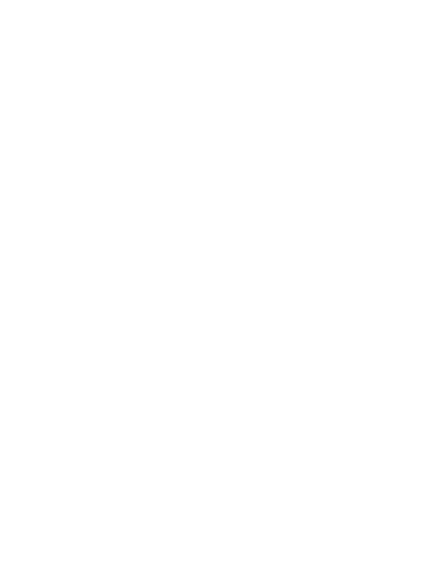

<IPython.core.display.Javascript object>


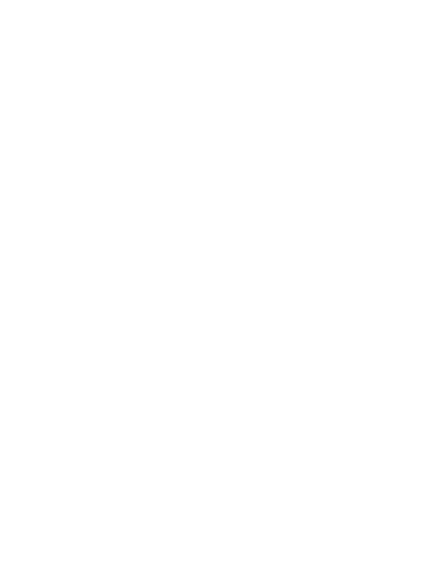

In [25]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["playlistname"].nunique().reset_index()
### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax = ax[0])
ax[0].set_title("Number of playlist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary['playlistname'] <= 50]
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax=ax[1])
ax[1].set_title("Number of playlist per user (where <=50)")
plt.show()

### Insight 1 
###### Above Plot shows that data is skewed toward smaller number of playlist. Which makes logical sense.
###### Also We see a few users which may have very high number of playlists

<IPython.core.display.Javascript object>


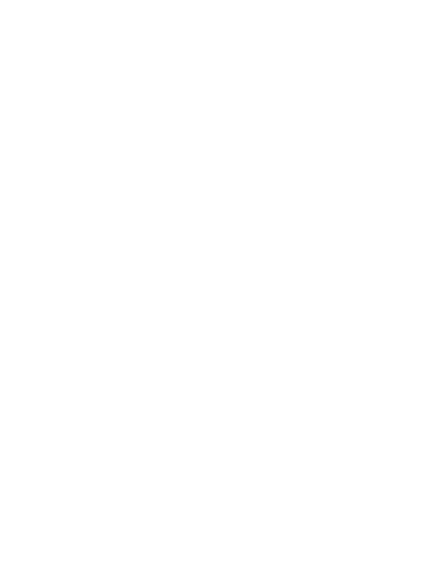

<IPython.core.display.Javascript object>


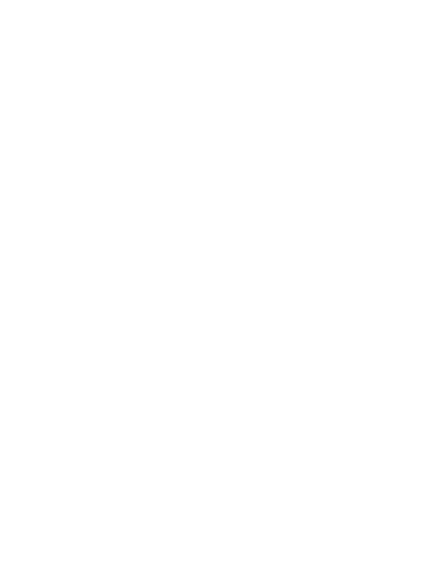

In [26]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["artistname"].nunique().reset_index()

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["artistname"], hist=True,ax = ax[0])
ax[0].set_title("Number of artist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["artistname"] <= 500]
sns.distplot(spotify_user_summary["artistname"], hist=True,ax=ax[1])
ax[1].set_title("Number of artist per user (where <=500)")
plt.show()

In [27]:
### Insight 2
###### Most of the users listen to less number of artist as compared higher number of artist
###### Also We see a few users which may have very high number of playlists 

<IPython.core.display.Javascript object>


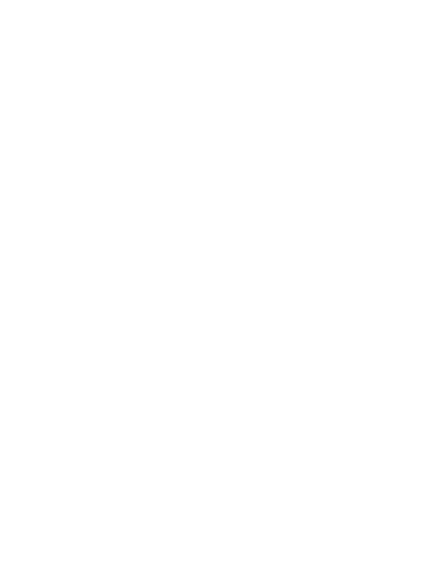

<IPython.core.display.Javascript object>


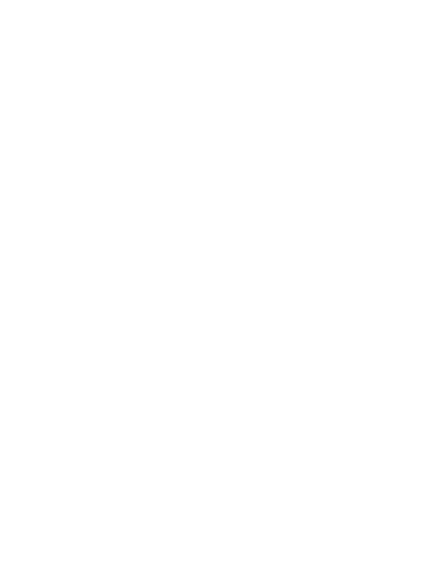

In [28]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname"].nunique().reset_index()

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["trackname"], hist=True,ax = ax[0])
ax[0].set_title("Number of tracks per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["trackname"] <= 500]
sns.distplot(spotify_user_summary["trackname"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per user (where <=500)")
plt.show()

<IPython.core.display.Javascript object>


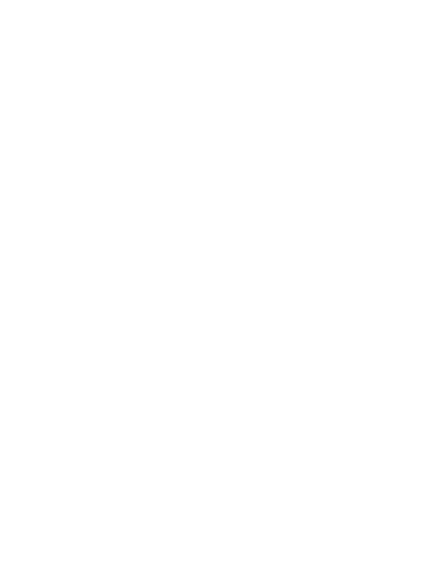

<IPython.core.display.Javascript object>


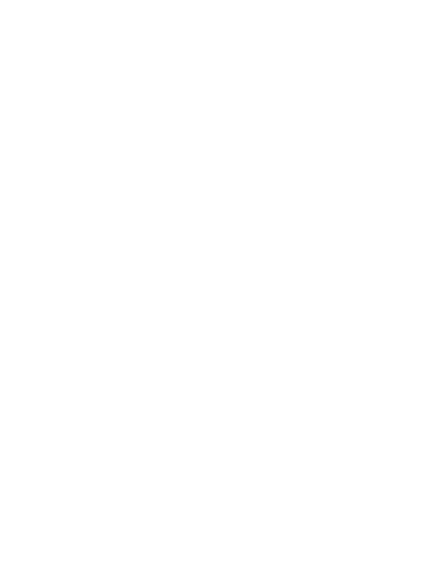

In [29]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname","artistname"].nunique().reset_index()
spotify_user_summary = spotify_user_summary[spotify_user_summary['artistname']>0]

spotify_user_summary['Track_to_artist_ratio'] = spotify_user_summary['trackname'] / spotify_user_summary['artistname']
spotify_user_summary.dropna(inplace = True)
spotify_user_summary['Track_to_artist_ratio'] = spotify_user_summary['Track_to_artist_ratio'].astype(int)

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["Track_to_artist_ratio"], hist=True,ax = ax[0])
ax[0].set_title("AVerage tracks per artist")
spotify_user_summary = spotify_user_summary[spotify_user_summary["Track_to_artist_ratio"] <= 40]
sns.distplot(spotify_user_summary["Track_to_artist_ratio"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per artist (where <=40)")
plt.show()

### Insight 3 
##### Majority of customers at an average listen a few songs from different artists
##### But we do have custmers who listen song a lot of songs from artists

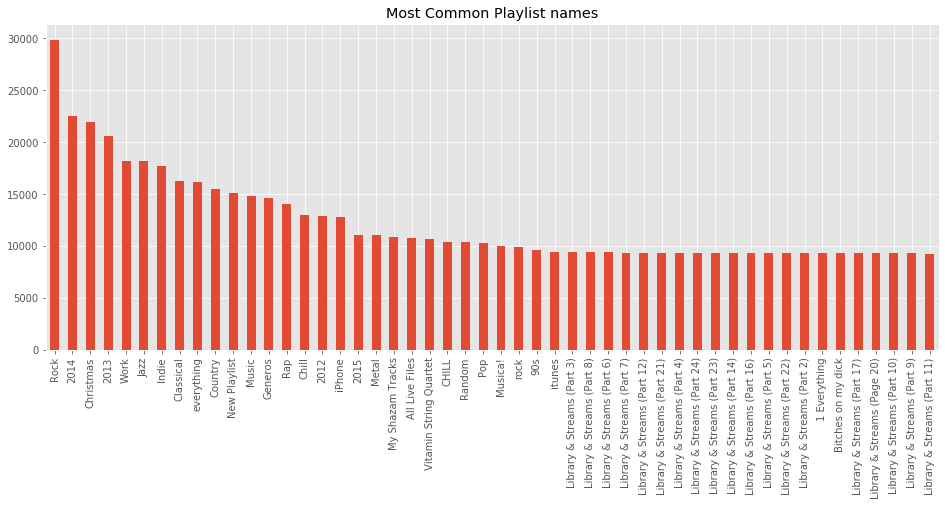

In [30]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['playlistname'].value_counts()[3:53].plot(kind= 'bar',title="Most Common Playlist names",figsize = (16,6))

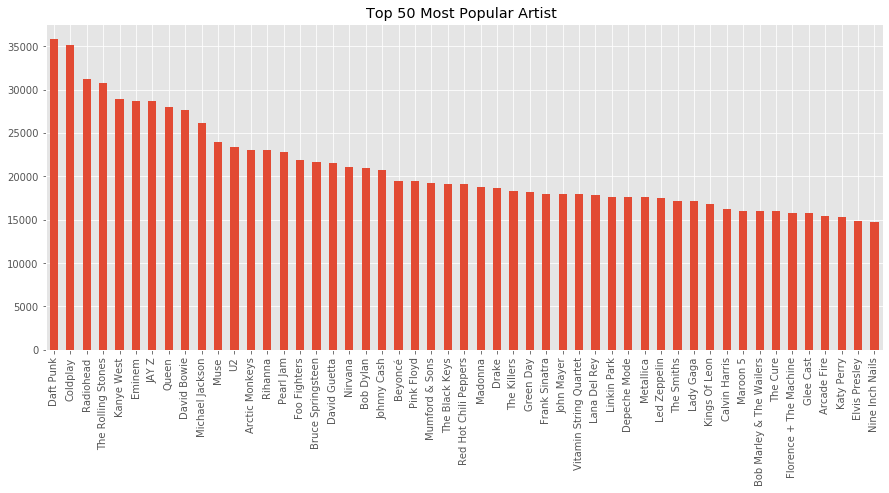

In [31]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['artistname'].value_counts()[0:51].plot(kind= 'bar',title="Top 50 Most Popular Artist ",figsize = (15,6))

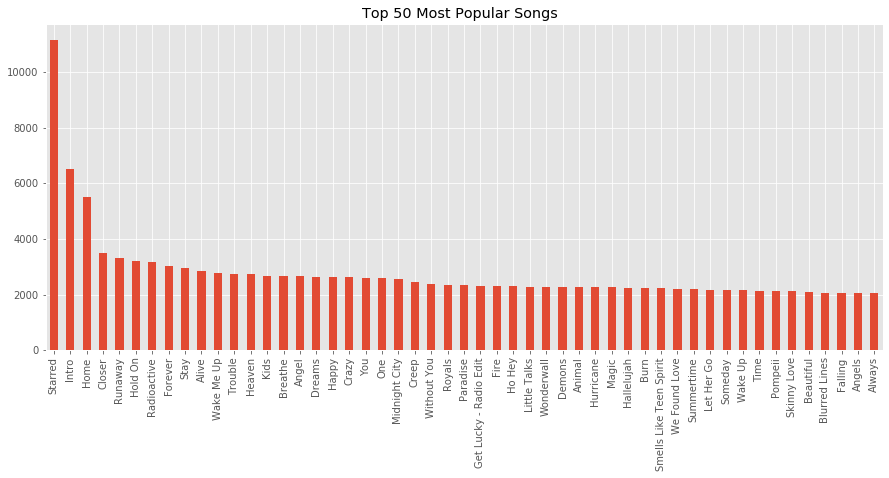

In [32]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['trackname'].value_counts()[0:51].plot(kind= 'bar',title="Top 50 Most Popular Songs  ",figsize = (15,6))

In [33]:
### Now lets define function which creates a dictionary and convert songs names to dictionary

tracklist = spotify_data['trackname'].unique()

In [34]:
### Create a function which takes a dataset name and column name 

def create_dict(dataset, column):
    ''' Takes two input from user column name and dataset name and return dictionary with hash map '''
    unique_list = dataset[column].unique()
    out_dict = {}
    out_dict1 = {}
    
    for j,i in enumerate(unique_list):
        out_dict[i] = j
        out_dict1[j] = i
        
    print ("Number of distinct in vocab is :",j)
    return (out_dict,out_dict1)

In [35]:
### call the dict functions on track names and artistname
track_map, track_map_comp= create_dict(spotify_data,'trackname')
artist_map,artist_map_comp = create_dict(spotify_data,'artistname')

Number of distinct in vocab is : 2057995
Number of distinct in vocab is : 303027


### We created two dicts as will first need to convert songs to numeric mapping and after we have trained the model we will return numeric to song mapping

In [36]:
with open('track_map_dict.pickle','wb') as track_file:
    pickle.dump(track_map,track_file)
with open('track_map_comp_dict.pickle','wb') as track_file_comp:
    pickle.dump(track_map_comp,track_file_comp)

In [37]:
with open('artist_map_dict.pickle','wb') as artist_file:
    pickle.dump(artist_map,artist_file)
with open('artist_map_comp_dict.pickle','wb') as artist_file_comp:
    pickle.dump(artist_map_comp,artist_file_comp)

### Data Processing For Word2vec models 
##### 1. Convert each artist name & song name to numeric using the dictionary first
##### 2. Roll up the data at User_id and Playlist level, and store songss in a playlist as list. Before doing that we will like to shuffle the datasets
##### 3. Train a word 2 vector model, and see how it works 

In [38]:
### Lets shuffle the data first
print ("Shape of data before sampling is:", spotify_data.shape)
spotify_data.sample(frac = 1,  random_state = 10000).reset_index(drop=True)
print ("Shape of data after sampling is :", spotify_data.shape)

Shape of data before sampling is: (12774191, 4)
Shape of data after sampling is : (12774191, 4)


In [39]:
### Load the pickle files stored for song to numeric 
with open('track_map_dict.pickle','rb') as dict1:
    track_dict= pickle.load( dict1)
print ("Track dict has {} observations".format(len(track_dict)))
#### Load the prcikle file for artist to numeric
with open('artist_map_dict.pickle','rb') as dict2:
    artist_dict = pickle.load(dict2)
print ("Track dict has {} observations".format(len(artist_dict)))

Track dict has 2057996 observations
Track dict has 303028 observations


In [40]:
### Now we will use this mapping to convert names to numeric
print ("Data before mapping dict :", spotify_data.head(5))
spotify_data['trackname'] = spotify_data['trackname'].map(track_dict)
spotify_data['artistname'] = spotify_data['artistname'].map(artist_dict)
print ("Data after mapping dict :")
print (spotify_data.head(5))

Data before mapping dict :                             user_id                        artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                           trackname    playlistname  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  
Data after mapping dict :
                            user_id  artistname  trackname    playlistname
0  9cc0

In [41]:
### We want to create a list of songs in zip file 
def zip_list(x):
    return ([z for z in x])

#### Lets group by data based on the user id and playlist and zip it as a list

In [44]:
spotify_summary = spotify_data.groupby(['user_id','playlistname'])['trackname'].apply(zip_list).reset_index()

In [45]:
print (" Distinct playlist after summarizing the data is :",spotify_summary.shape[0])
print (" The data looks like this :")
print (spotify_summary.head(5))

 Distinct playlist after summarizing the data is : 229424
 The data looks like this :
                            user_id      playlistname  \
0  00055176fea33f6e027cd3302289378b              favs   
1  0007f3dd09c91198371454c608d47f22              2014   
2  0007f3dd09c91198371454c608d47f22         Fav songs   
3  0007f3dd09c91198371454c608d47f22         Sad songs   
4  000b0f32b5739f052b9d40fcc5c41079  Agnetha Fältskog   

                                           trackname  
0  [9686, 2620, 47119, 9687, 18286, 37671, 63969,...  
1                 [39014, 1556, 901254, 17703, 5341]  
2  [37976, 39014, 2650, 126914, 19773, 1496, 2757...  
3                                        [204, 8452]  
4                                   [464482, 497151]  


In [48]:
### We will Dump this data in the pickle file and work in it later
with open("spotify_summary.pickle",'wb') as pick_data:
    pickle.dump(spotify_summary,pick_data)
    print ("The dataset is pickled at ",os.getcwd())

The dataset is pickled at  C:\Users\ash\Desktop\NLP-DL
